In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
#%run -i 'functions.py'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.metrics import confusion_matrix
import itertools
from imblearn.over_sampling import SMOTE

In [2]:
pd.set_option('display.max_columns', None)
master = pd.read_csv('final_data.csv')
master.head()

,Unnamed: 0,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,0,minor,2,1,Monday,midnight,A_road,single_lane,20,yield,0,ped_light,1,clear,1,0,0,1,1,"(51.529746, -0.102474)",taxi,0,turn_left,0,none,on_road,front,1,work,1,40,7,hybrid/electric,6,low,city,poor,winter
1,1,severe,2,1,Monday,late_night,B_road,two_lane,30,traffic_light,0,ped_light,1,rain,0,0,0,1,1,"(51.530179, 0.037828)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,27,6,petrol,1,middle,city,good,winter
2,2,severe,2,1,Monday,early_morning,C_road,single_lane,30,yield,0,none,1,clear,1,0,0,1,1,"(51.514545, -0.199239)",taxi,0,exiting,0,none,on_road,front,1,work,1,66,10,electric,5,low,city,poor,winter
3,3,minor,3,1,Monday,early_morning,A_road,one_way,30,yield,0,none,1,clear,1,0,0,1,1,"(51.475091, -0.032886)",taxi,0,driving,0,none,on_road,back,1,work,2,36,7,hybrid/electric,2,low,city,poor,winter
4,4,minor,2,1,Monday,midnight,Unclassified,single_lane,30,yield,0,cross_walk,1,clear,1,0,0,1,1,"(51.56325, -0.311872)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,24,5,petrol,9,low,city,okay,winter


In [3]:
master.drop(['Unnamed: 0'],axis=1 , inplace=True)

In [4]:
master['accident_severity'] = pd.factorize(master['accident_severity'])[0]+1
master['day_of_week'] = pd.factorize(master['day_of_week'])[0]+1
master['time'] = pd.factorize(master['time'])[0]+1
master['road_class'] = pd.factorize(master['road_class'])[0]+1
master['junction_control'] = pd.factorize(master['junction_control'])[0]+1
master['ped_crossway'] = pd.factorize(master['ped_crossway'])[0]+1
master['weather_conditions'] = pd.factorize(master['weather_conditions'])[0]+1
master['vehicle_type'] = pd.factorize(master['vehicle_type'])[0]+1
master['vehicle_activity'] = pd.factorize(master['accident_severity'])[0]+1
master['vehicle_action'] = pd.factorize(master['vehicle_action'])[0]+1
master['vehicle_loc_post_impact'] = pd.factorize(master['accident_severity'])[0]+1
master['impact_type'] = pd.factorize(master['impact_type'])[0]+1
master['journey_purpose_of_driver'] = pd.factorize(master['journey_purpose_of_driver'])[0]+1
master['propulsion'] = pd.factorize(master['propulsion'])[0]+1
master['socioeconomic_status'] = pd.factorize(master['socioeconomic_status'])[0]+1
master['driver_residence'] = pd.factorize(master['driver_residence'])[0]+1
master['car_status'] = pd.factorize(master['car_status'])[0]+1
master['season'] = pd.factorize(master['season'])[0]+1
master['road_type'] = pd.factorize(master['road_type'])[0]+1

In [5]:
master.drop(['coordinates', 'age_bin_driver'],axis=1 , inplace=True)

In [6]:
df = master

In [7]:
X = df.drop(columns=['accident_severity'], axis=1)
y = df['accident_severity']

In [8]:
X = df.drop(columns=['accident_severity'], axis=1)
y = df['accident_severity']
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_trainK, y_train)

y_pred = model.predict(X_test)

In [13]:
print(metrics.confusion_matrix(y_test, y_pred))

[[6344 3904  620]
 [5298 4717  993]
 [4641 4325 2090]]


In [14]:
y_test.value_counts()

3    11056
2    11008
1    10868
Name: accident_severity, dtype: int64

In [15]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Slight', 'Serious','Fatal']

Confusion Matrix, without normalization
[[6344 3904  620]
 [5298 4717  993]
 [4641 4325 2090]]


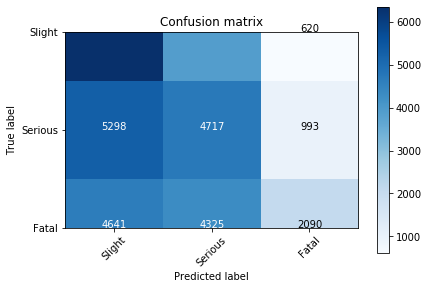

In [16]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [24]:
 from sklearn.metrics import f1_score

In [47]:
data = { 
    'Micro': [ 
precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 SCore', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

,Micro,Macro,Weighted
Precison,0.892658,0.908302,0.908112
Recall,0.892658,0.891736,0.892658
F1 SCore,0.892658,0.889896,0.890320


In [36]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.9342929267894967, 0.9560765139875925, 0.9191909414628762, 0.9356396409705545, 0.9072138771915613, 0.9224695983519821, 0.8974154254301755, 0.9134015697920543, 0.8903204176171743, 0.9039386501895866]


In [42]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)  


model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [43]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 7738  3003   127]
 [  202 10604   202]
 [    0     1 11055]]


In [44]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Slight', 'Serious','Fatal']

Confusion Matrix, without normalization
[[ 7738  3003   127]
 [  202 10604   202]
 [    0     1 11055]]


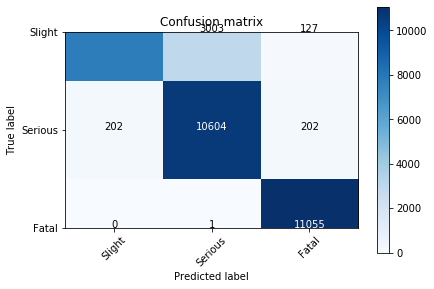

In [45]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [48]:
data = { 
    'Micro': [ 
precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 SCore', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

,Micro,Macro,Weighted
Precison,0.892658,0.908302,0.908112
Recall,0.892658,0.891736,0.892658
F1 SCore,0.892658,0.889896,0.890320
